<a href="https://colab.research.google.com/github/pinilDissanayaka/Election-Insight-App/blob/main/Notebook_manifesto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.9/206.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.8/289.8 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7

In [3]:
import os
from pinecone import Pinecone, ServerlessSpec
from google.colab import userdata
from langchain_huggingface.embeddings import HuggingFaceEmbeddings
from langchain_groq.chat_models import ChatGroq
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_experimental.text_splitter import SemanticChunker
from langchain.document_loaders import PyPDFLoader
from langchain_pinecone import PineconeVectorStore
from pydantic import BaseModel, Field
from typing import List, TypedDict
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain.prompts import ChatPromptTemplate

In [4]:
os.environ['GOOGLE_API_KEY']=userdata.get('GOOGLE_API_KEY')
os.environ['PINECONE_API_KEY']=userdata.get('PINECORN_API_KEY')
os.environ['GROQ_API_KEY']=userdata.get('GROQ_API_KEY')
os.environ['LANGCHAIN_API_KEY']=userdata.get('LANGCHAIN_API_KEY')
os.environ['LANGCHAIN_TRACING_V2']='true'

In [5]:
model_name = "sentence-transformers/all-mpnet-base-v2"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': True}

embeddings=HuggingFaceEmbeddings(model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
def load(path):
  print("=" * 60)
  manifesto_data=PyPDFLoader(path).load()
  print(f"Loaded documents {len(manifesto_data)}")
  print("=" * 60)
  return manifesto_data

def split(docs):
  doc_splits = RecursiveCharacterTextSplitter(
    chunk_size=1200,
    chunk_overlap=390,
    length_function=len,
    is_separator_regex=False,
  ).split_documents(docs)

  return doc_splits

def store(doc_splits, index_name='manifesto'):
  pinecone_vectore_store=PineconeVectorStore.from_documents(documents=doc_splits, embedding=embeddings, index_name="manifesto")
  return pinecone_vectore_store

In [ ]:
manifestos_paths=[
    '/content/NAMAL_VISION 2025-2035 Policy_Targets_and_Innovation_Strategies (En) .pdf',
    '/content/NPP Presidential Election Manifesto - 2024.pdf',
    '/content/Sajith_manifesto_english.pdf'
]


In [ ]:
def createIndex(indexName:str, dimension:int):
  try:
    pinecone=Pinecone()
    if indexName not in pinecone.list_indexes().names():
      pinecone.create_index(
          name=indexName,
          dimension=dimension,
          metric="cosine",
          spec=ServerlessSpec(cloud='aws',
                            region='us-east-1')
      )
      print(f"Created {indexName}")
    else:
      print(f"{indexName} already exists")
    print(pinecone.describe_index(indexName))
    return pinecone.Index(indexName)
  except Exception as e:
    print(e.args)

In [ ]:
dimention=768

In [ ]:
index=createIndex(indexName="manifesto", dimension=dimention)

Created manifesto
{'deletion_protection': 'disabled',
 'dimension': 768,
 'host': 'manifesto-4myrn7y.svc.aped-4627-b74a.pinecone.io',
 'metric': 'cosine',
 'name': 'manifesto',
 'spec': {'serverless': {'cloud': 'aws', 'region': 'us-east-1'}},
 'status': {'ready': True, 'state': 'Ready'}}


In [ ]:
vector_store=[store(split(load(path))) for path in manifestos_paths]

Loaded documents 49
Loaded documents 130
Loaded documents 44


In [46]:
retriever=PineconeVectorStore(embedding=embeddings, index_name="manifesto").as_retriever(search_kwargs={"k": 15})

In [47]:
llm=ChatGroq(model="llama-3.1-8b-instant")

In [60]:
prompt_template='''
        Compare the manifestos of all candidates focusing on the key issues of {FIELD}.
        using only given context : {CONTEXT}
        Provide a side-by-side breakdown of their promises, highlighting similarities, differences, and unique approaches.
        Summarize the main goals and policies for each candidate and offer an analysis of how these align with their past statements or voting records,
        if available.and assing some marks for boths peoples out of 10.
        If the answer is not found in the context, kindly state "I don't know." Don't try to make up an answer."

'''

prompt=ChatPromptTemplate.from_template(prompt_template)

print(prompt)

input_variables=['CONTEXT', 'FIELD'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['CONTEXT', 'FIELD'], input_types={}, partial_variables={}, template='\n        Compare the manifestos of all candidates focusing on the key issues of {FIELD}.\n        using only given context : {CONTEXT}\n        Provide a side-by-side breakdown of their promises, highlighting similarities, differences, and unique approaches.\n        Summarize the main goals and policies for each candidate and offer an analysis of how these align with their past statements or voting records,\n        if available.and assing some marks for boths peoples out of 10.\n        If the answer is not found in the context, kindly state "I don\'t know." Don\'t try to make up an answer."\n\n        MARKS: \n\n'), additional_kwargs={})]


In [63]:
chain = (
    {"FIELD":RunnablePassthrough(), "CONTEXT": retriever}
    | prompt
    | llm
    | StrOutputParser()
    )

In [64]:
chain.invoke("health")

"After analyzing the manifestos of the candidates, here's a side-by-side breakdown of their promises, highlighting similarities, differences, and unique approaches.\n\n**Candidate 1: NPP Presidential Election Manifesto - 2024**\n\n* Health Service Management: Gradually increase government expenditure on health to at least 3% of the GDP, utilize funds efficiently, and combat corruption.\n* Digital Health: Digitize patient records, implement online registration for medical appointments, and enhance the effectiveness of the health services information system.\n* Health Promotion and Disease Prevention: Implement community-based mechanisms to identify, manage, and treat chronic non-communicable diseases, conduct annual health screenings, promote healthy lifestyles, and establish health promotion programs to control severe and chronic malnutrition and obesity.\n* Food Safety: Establish an organization to regulate food-related advertisements, control substandard food and beverage production,

In [65]:
from typing import TypedDict, List
from pydantic import BaseModel, Field

In [73]:
class Graph_State(TypedDict):
  evaluation: str
  documents: List[str]
  genaration: str
  candidates: str
  field: str

In [74]:
def retrieve(state:Graph_State):
  question=f"Compare the manifestos of {state['candidates']} focusing on the key issues of {state['field']}"

  documents=retriever.get_relevant_documents(question)

  return {"documents": documents}

In [108]:
def genarate(state:Graph_State):
  summary_prompt_template='''
        Compare the manifestos of all candidates focusing on the key issues of {FIELD} with candidate names.
        using only given context : {CONTEXT}
        Provide a side-by-side breakdown of their promises, highlighting similarities, differences, and unique approaches.
        Summarize the main goals and policies for each candidate and offer an analysis of how these align with their past statements or voting records,
        If the answer is not found in the context, kindly state "I don't know." Don't try to make up an answer."
    '''

  summary_prompt=ChatPromptTemplate.from_template(prompt_template)


  summary_chain = (
    {"FIELD":RunnablePassthrough(), "CONTEXT": retriever}
    | summary_prompt
    | llm
    | StrOutputParser()
    )

  genaration=summary_chain.invoke(state['field'])

  return {"genaration": genaration}

In [113]:
def evaluate(state:Graph_State):
  evaluate_prompt_template='''
  "Evaluate the manifesto of all candidate on a scale of 1 to 10 based on the following criteria Using given context : {CONTEXT} with candidate names
    Provide an overall score out of 10"
  '''

  evaluate_prompt=ChatPromptTemplate.from_template(evaluate_prompt_template)


  evaluate_chain = (
    {"CONTEXT": RunnablePassthrough()}
    | evaluate_prompt
    | llm
    | StrOutputParser()
    )

  evaluation=evaluate_chain.invoke({"CONTEXT": state['documents']})

  return {"evaluation": evaluation}


In [114]:
from langgraph.graph import END, StateGraph, START

workflow = StateGraph(Graph_State)

# Define the nodes
workflow.add_node("retrieve", retrieve)  # retrieve
workflow.add_node("generate", genarate)  # generatae
workflow.add_node("evaluate", evaluate)  # evaluate



workflow.add_edge(START, "retrieve")
workflow.add_edge("retrieve", "generate")
workflow.add_edge("generate", "evaluate")
workflow.add_edge("evaluate", END)

graph=workflow.compile()

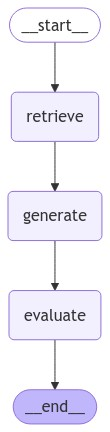

In [115]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [116]:
for event in graph.stream({"field": "health", "candidates": "all"}):
    for value in event.values():
      print(value)

{'documents': [Document(id='a73964d0-68b7-4462-9fdf-d618efe194c3', metadata={'page': 16.0, 'source': '/content/NPP Presidential Election Manifesto - 2024.pdf'}, page_content='17ACTIVITIES  \nEffective Health Service Management\n■ Gradually increase government expenditure on health to at least 3% of the GDP \nwithin a short period.\n■ Utilize funds efficiently and transparently while actively combating corruption in \nthe health sector.\nDigital Health \n■ Digitize patient records and information to enhance the effectiveness and \nefficiency of the health services information system.\n■ Implement online registration for medical appointments to minimize waiting \ntimes at health services institutions.\nHealth Promotion and Disease prevention \n• Implement community-based mechanisms to identify, manage, and treat chronic \nnon-communicable diseases.\n• Conduct annual health screenings for all individuals over the age of 40.\n• Promote healthy lifestyles, including exercise, walking, and c